# TP 1 - Prétraitement (NLP)

L'objectif de ce TP est d'implémenter quelques techniques de prétraitement sur des textes standard : Tokenisation, Stemming, Lemmatisation, Stopwords, et N-grams.

## 1. Tokenisation

In [1]:
# Importer la libraire python pour faire la tokenisation
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# Introduire un texte en anglais
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."

print(text)

[nltk_data] Downloading package punkt to /Users/pierre/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pierre/nltk_data...


Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# Tokenisation des phrases (séparées par un point)
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    print(sentence)
    print()

Backgammon is one of the oldest known board games.

Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.

It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.



In [3]:
# Tokenisation des mots (séparés par un espace)
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(words)
    print()

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']

['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']

['It', 'is', 'a', 'two-player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']



### Question :
Prenez un texte aléatoire en Français et faites le même process de tokenisation avec un point et un espace.

In [4]:
text_fr = "L'intelligence artificielle est un domaine en pleine expansion. Elle transforme de nombreux secteurs d'activité. C'est fascinant !"

# Tokenisation des phrases
sentences_fr = nltk.sent_tokenize(text_fr, language='french')
print("--- Phrases (Français) ---")
for s in sentences_fr:
    print(s)

print()

# Tokenisation des mots
print("--- Mots (Français) ---")
for s in sentences_fr:
    print(nltk.word_tokenize(s, language='french'))

--- Phrases (Français) ---
L'intelligence artificielle est un domaine en pleine expansion.
Elle transforme de nombreux secteurs d'activité.
C'est fascinant !

--- Mots (Français) ---
["L'intelligence", 'artificielle', 'est', 'un', 'domaine', 'en', 'pleine', 'expansion', '.']
['Elle', 'transforme', 'de', 'nombreux', 'secteurs', "d'activité", '.']
["C'est", 'fascinant', '!']


## 2. Lemmatisation et Stemming

In [5]:
# Importer les librairies
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser stemmer et lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Fonction pour comparer
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

[nltk_data] Downloading package wordnet to /Users/pierre/nltk_data...


[nltk_data] Downloading package omw-1.4 to /Users/pierre/nltk_data...


In [6]:
# Essayer quelques mots en anglais
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "seen", wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "drove", wordnet.VERB)

# Qu’est qui se passe si l’on fait une erreur de frappe sur un mot ?
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "increible", wordnet.ADJ)

# Mot qui change de sens ou de forme
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "better", wordnet.ADJ)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive

Stemmer: increibl
Lemmatizer: increible

Stemmer: better
Lemmatizer: good



## 3. Stopwords

In [7]:
# Importer la librairie nécessaire
from nltk.corpus import stopwords
nltk.download('stopwords')

# Visualiser les stopwords en français et en anglais
print(f"Stopwords anglais (tête): {stopwords.words('english')[:10]}")
print(f"Stopwords français (tête): {stopwords.words('french')[:10]}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierre/nltk_data...


Stopwords anglais (tête): ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
Stopwords français (tête): ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Appliquer la fonction stopwords a une phrase en anglais
stop_words_en = set(stopwords.words("english"))
sentence_en = "Backgammon is one of the oldest known board games."

words_en = nltk.word_tokenize(sentence_en)
without_stop_words_en = [word for word in words_en if not word.lower() in stop_words_en]

print(f"Original: {sentence_en}")
print(f"Sans stopwords: {without_stop_words_en}")

Original: Backgammon is one of the oldest known board games.
Sans stopwords: ['Backgammon', 'one', 'oldest', 'known', 'board', 'games', '.']


In [9]:
# Appliquer la fonction stopwords a une phrase en français
stop_words_fr = set(stopwords.words("french"))
sentence_fr = "Dans cet article, je vais passer en revue la majorité des principaux modèles de Machine Learning"

words_fr = nltk.word_tokenize(sentence_fr, language='french')
without_stop_words_fr = [word for word in words_fr if not word.lower() in stop_words_fr]

print(f"Original: {sentence_fr}")
print(f"Sans stopwords: {without_stop_words_fr}")

Original: Dans cet article, je vais passer en revue la majorité des principaux modèles de Machine Learning
Sans stopwords: ['cet', 'article', ',', 'vais', 'passer', 'revue', 'majorité', 'principaux', 'modèles', 'Machine', 'Learning']


## 4. N-gram

In [10]:
# Importer la librairie pour appliquer N-gram
from nltk.util import ngrams

# Fonction pour générer n-grams
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

data = 'A class is a blueprint for the object. Backgammon is one of the oldest known board games.'

print("1-gram:", extract_ngrams(data, 1))
print("2-gram:", extract_ngrams(data, 2))
print("3-gram:", extract_ngrams(data, 3))

1-gram: ['A', 'class', 'is', 'a', 'blueprint', 'for', 'the', 'object', '.', 'Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
2-gram: ['A class', 'class is', 'is a', 'a blueprint', 'blueprint for', 'for the', 'the object', 'object .', '. Backgammon', 'Backgammon is', 'is one', 'one of', 'of the', 'the oldest', 'oldest known', 'known board', 'board games', 'games .']
3-gram: ['A class is', 'class is a', 'is a blueprint', 'a blueprint for', 'blueprint for the', 'for the object', 'the object .', 'object . Backgammon', '. Backgammon is', 'Backgammon is one', 'is one of', 'one of the', 'of the oldest', 'the oldest known', 'oldest known board', 'known board games', 'board games .']


## 5. Analyse fréquentielle

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pierre/nltk_data...


[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package webtext to /Users/pierre/nltk_data...


[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pierre/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Nombre de mots total: 192427
Nombre de mots uniques: 7811
Top 10 mots fréquents (> 3 lettres): [('that', 1730), ('have', 1301), ('with', 1187), ('very', 1151), ('Emma', 865), ('could', 825), ('would', 815), ('been', 759), ('Miss', 592), ('were', 591)]


<Axes: xlabel='Samples', ylabel='Counts'>

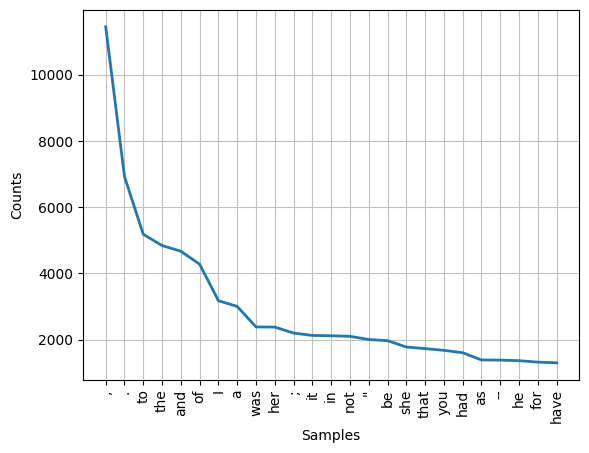

In [11]:
import nltk
nltk.download('gutenberg')
nltk.download('webtext')
from nltk.probability import FreqDist

# Utilisation du corpus gutenberg (Emma de Jane Austen)
nltk.download('gutenberg')
words = nltk.corpus.gutenberg.words('austen-emma.txt')

# Distribution de fréquence
data_analysis = FreqDist(words)

# Mots avec fréquence > 3
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])

print("Nombre de mots total:", len(words))
print("Nombre de mots uniques:", len(data_analysis))

# Afficher les 10 mots les plus fréquents (de plus de 3 lettres)
# Note: On trie le dictionnaire filtré pour l'affichage
sorted_filter_words = sorted(filter_words.items(), key=lambda x: x[1], reverse=True)
print("Top 10 mots fréquents (> 3 lettres):", sorted_filter_words[:10])

# Visualisation
data_analysis.plot(25, cumulative=False)